In [12]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Fetch the data [multiple gdp datasets]
df = pd.read_csv("https://ourworldindata.org/grapher/value-added-in-the-agricultural-sector-as-of-gdp-vs-gdp-per-capita.csv?v=1&csvType=full&useColumnShortNames=true", storage_options = {'User-Agent': 'Our World In Data data fetch/1.0'})
gdp = pd.read_csv("https://ourworldindata.org/grapher/gdp-worldbank-constant-usd.csv?v=1&csvType=full&useColumnShortNames=true", storage_options = {'User-Agent': 'Our World In Data data fetch/1.0'})

# Fetch the metadata
metadata = requests.get("https://ourworldindata.org/grapher/value-added-in-the-agricultural-sector-as-of-gdp-vs-gdp-per-capita.metadata.json?v=1&csvType=full&useColumnShortNames=true").json()

# EDA

In [13]:
df.head()

,Entity,Code,Year,nv_agr_totl_zs,ny_gdp_pcap_pp_kd,population_historical,owid_region
0,Afghanistan,AFG,2002,38.627890,1774.3087,21378123.0,NaN
1,Afghanistan,AFG,2003,37.418854,1815.9282,22733054.0,NaN
2,Afghanistan,AFG,2004,29.721067,1776.9182,23560656.0,NaN
3,Afghanistan,AFG,2005,31.114855,1908.1147,24404574.0,NaN
4,Afghanistan,AFG,2006,28.635970,1929.7239,25424100.0,NaN


In [14]:
gdp.head()

,Entity,Code,Year,ny_gdp_mktp_kd
0,Afghanistan,AFG,2000,6.206548e+09
1,Afghanistan,AFG,2001,5.621148e+09
2,Afghanistan,AFG,2002,7.228796e+09
3,Afghanistan,AFG,2003,7.867264e+09
4,Afghanistan,AFG,2004,7.978516e+09


In [15]:
#truncate data to only years 1960
df= df[df['Year']>=1960]
gdp = gdp[gdp['Year']>=1960]

df.columns

Index(['Entity', 'Code', 'Year', 'nv_agr_totl_zs', 'ny_gdp_pcap_pp_kd',
       'population_historical', 'owid_region'],
      dtype='object')

In [16]:
df.head(10)

,Entity,Code,Year,nv_agr_totl_zs,ny_gdp_pcap_pp_kd,population_historical,owid_region
0,Afghanistan,AFG,2002,38.627890,1774.3087,21378123.0,NaN
1,Afghanistan,AFG,2003,37.418854,1815.9282,22733054.0,NaN
2,Afghanistan,AFG,2004,29.721067,1776.9182,23560656.0,NaN
3,Afghanistan,AFG,2005,31.114855,1908.1147,24404574.0,NaN
4,Afghanistan,AFG,2006,28.635970,1929.7239,25424100.0,NaN
5,Afghanistan,AFG,2007,30.105011,2155.3530,25909852.0,NaN
6,Afghanistan,AFG,2008,24.892270,2191.5044,26482629.0,NaN
7,Afghanistan,AFG,2009,29.297500,2565.0220,27466101.0,NaN
8,Afghanistan,AFG,2010,26.210068,2848.5862,28284088.0,NaN
9,Afghanistan,AFG,2011,23.743664,2757.0525,29347709.0,NaN


In [17]:
#rename columns

df= df.rename(columns={'Entity':'Country', 'nv_agr_totl_zs': 'agr_pct', 'ny_gdp_pcap_pp_kd': 'gdp', 'population_historical': 'pop'})
df.head(5)

,Country,Code,Year,agr_pct,gdp,pop,owid_region
0,Afghanistan,AFG,2002,38.627890,1774.3087,21378123.0,NaN
1,Afghanistan,AFG,2003,37.418854,1815.9282,22733054.0,NaN
2,Afghanistan,AFG,2004,29.721067,1776.9182,23560656.0,NaN
3,Afghanistan,AFG,2005,31.114855,1908.1147,24404574.0,NaN
4,Afghanistan,AFG,2006,28.635970,1929.7239,25424100.0,NaN


In [18]:
df = df.sort_values(by=['Country', 'Year'])

df['gdp_change'] = df.groupby('Country')['gdp'].pct_change() * 100

C:\Users\felic\AppData\Local\Temp\ipykernel_29300\2728711092.py:3: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['gdp_change'] = df.groupby('Country')['gdp'].pct_change() * 100


In [19]:
region_dict = df[['Country', 'owid_region', 'Year']].copy()
region_dict = region_dict[region_dict['Year']==2023]

region_dict

,Country,owid_region,Year
21,Afghanistan,Asia,2023
525,Africa,NaN,2023
599,Africa (UN),NaN,2023
603,Aland Islands,Europe,2023
631,Albania,Europe,2023
...,...,...,...
59022,Yemen Arab Republic,Asia,2023
59046,Yemen People's Republic,Asia,2023
59124,Yugoslavia,Europe,2023
59188,Zambia,Africa,2023


In [20]:
region = dict(zip(region_dict.Country, region_dict.owid_region))
region

{'Afghanistan': 'Asia',
 'Africa': nan,
 'Africa (UN)': nan,
 'Aland Islands': 'Europe',
 'Albania': 'Europe',
 'Algeria': 'Africa',
 'American Samoa': 'Oceania',
 'Americas (UN)': nan,
 'Andorra': 'Europe',
 'Angola': 'Africa',
 'Anguilla': 'North America',
 'Antigua and Barbuda': 'North America',
 'Argentina': 'South America',
 'Armenia': 'Asia',
 'Aruba': 'North America',
 'Asia': nan,
 'Asia (UN)': nan,
 'Asia (excl. China and India)': nan,
 'Australia': 'Oceania',
 'Austria': 'Europe',
 'Austria-Hungary': 'Europe',
 'Azerbaijan': 'Asia',
 'Bahamas': 'North America',
 'Bahrain': 'Asia',
 'Bangladesh': 'Asia',
 'Barbados': 'North America',
 'Belarus': 'Europe',
 'Belgium': 'Europe',
 'Belize': 'North America',
 'Benin': 'Africa',
 'Bermuda': 'North America',
 'Bhutan': 'Asia',
 'Bolivia': 'South America',
 'Bonaire Sint Eustatius and Saba': 'North America',
 'Bosnia and Herzegovina': 'Europe',
 'Botswana': 'Africa',
 'Brazil': 'South America',
 'British Indian Ocean Territory': 'Asi

In [21]:
#put region back to the original dataset
df['Region']= df['Country'].map(region)
df

,Country,Code,Year,agr_pct,gdp,pop,owid_region,gdp_change,Region
221,Afghanistan,AFG,1960,NaN,NaN,9035048.0,NaN,NaN,Asia
222,Afghanistan,AFG,1961,NaN,NaN,9214082.0,NaN,NaN,Asia
223,Afghanistan,AFG,1962,NaN,NaN,9404411.0,NaN,NaN,Asia
224,Afghanistan,AFG,1963,NaN,NaN,9604491.0,NaN,NaN,Asia
225,Afghanistan,AFG,1964,NaN,NaN,9814318.0,NaN,NaN,Asia
...,...,...,...,...,...,...,...,...,...
59440,Zimbabwe,ZWE,2019,9.819262,3294.8062,15271377.0,NaN,-7.785577,Africa
59441,Zimbabwe,ZWE,2020,8.772859,2987.2698,15526888.0,NaN,-9.333975,Africa
59442,Zimbabwe,ZWE,2021,8.849899,3184.7854,15797220.0,NaN,6.611910,Africa
59443,Zimbabwe,ZWE,2022,7.170550,3323.1218,16069061.0,NaN,4.343665,Africa


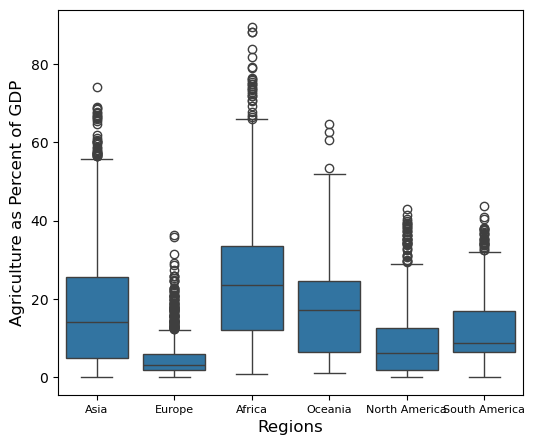

In [22]:
## Boxplot 
plt.figure(figsize=(6,5))

sns.boxplot(data = df,
               y = 'agr_pct',
               x = 'Region')

plt.yticks(fontsize=10)
plt.xticks(fontsize=8)

plt.ylabel("Agriculture as Percent of GDP", fontsize=12)
plt.xlabel("Regions", fontsize=12)

plt.show()

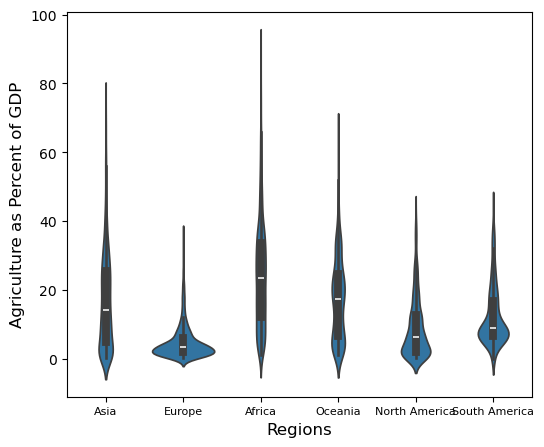

In [23]:
## violinplot 
plt.figure(figsize=(6,5))

sns.violinplot(data = df,
               y = 'agr_pct',
               x = 'Region')

plt.yticks(fontsize=10)
plt.xticks(fontsize=8)

plt.ylabel("Agriculture as Percent of GDP", fontsize=12)
plt.xlabel("Regions", fontsize=12)

plt.show()

Text(0.5, 0, 'Year')

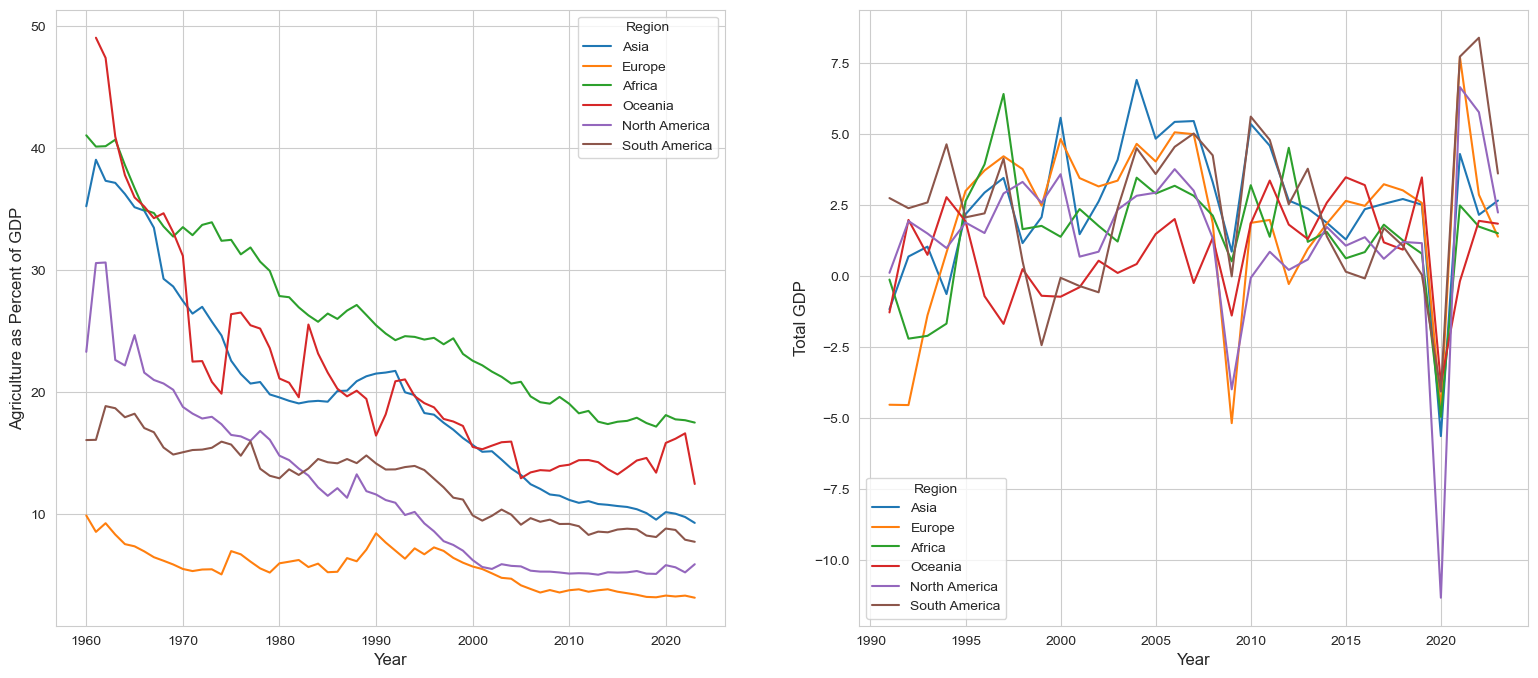

In [24]:
sns.set_style("whitegrid")
plt.figure(figsize=(19,8))
plt.subplot(1,2,1)
lineplot= sns.lineplot(data=df, x="Year", y="agr_pct", hue="Region", errorbar= None)

plt.yticks(fontsize=10)
plt.xticks(fontsize=10)

plt.ylabel("Agriculture as Percent of GDP", fontsize=12)
plt.xlabel("Year", fontsize=12)

plt.subplot(1,2,2)
lineplot= sns.lineplot(data=df, x="Year", y="gdp_change", hue="Region", errorbar= None)

plt.yticks(fontsize=10)
plt.xticks(fontsize=10)

plt.ylabel("Total GDP", fontsize=12)
plt.xlabel("Year", fontsize=12)



In [25]:
comm_df= pd.read_csv("long-term-prices-food/long-term-prices-food.csv")

comm_df= comm_df[comm_df['Year']>=1960]

comm_df.head(10)

,Entity,Code,Year,Tea,Sugar,Peanuts,Palm oil,Coffee,Cocoa,Wheat,Rye,Rice,Corn,Barley,Pork,Beef,Lamb
110,World,OWID_WRL,1960,88.604030,30.491224,88.649780,68.463100,122.79441,46.457430,77.220190,48.380486,46.496735,82.647210,56.718433,47.396427,270.78120,298.56946
111,World,OWID_WRL,1961,81.079660,27.104258,95.659390,68.984680,117.88081,37.366806,80.895200,54.846190,51.004875,80.470436,57.805614,51.046700,248.20020,241.74040
112,World,OWID_WRL,1962,81.954290,27.806490,95.452320,64.572140,108.36326,35.357180,79.721360,50.847282,57.205130,79.580925,62.540040,49.695396,256.99014,226.82794
113,World,OWID_WRL,1963,79.317665,81.629390,96.045170,65.630100,103.63574,42.142014,76.048340,57.306680,52.651676,87.258200,65.275890,40.895016,236.97522,271.92210
114,World,OWID_WRL,1964,76.142260,55.533466,94.776130,69.730705,128.16061,38.076730,63.923054,54.455060,49.675446,85.890990,67.545510,39.988520,295.09723,297.34073
115,World,OWID_WRL,1965,80.783200,19.111565,94.848520,78.028010,124.83429,27.041779,58.127857,50.297253,48.289050,87.566440,64.301900,53.305492,304.19632,224.04192
116,World,OWID_WRL,1966,68.651840,16.729107,91.409775,65.597450,112.68278,37.255157,61.741913,53.057163,57.389760,89.849480,66.543120,53.802616,342.97482,221.97410
117,World,OWID_WRL,1967,63.805954,17.177220,89.623340,60.453575,101.90392,41.836190,52.222404,52.050390,72.741320,82.052345,65.515305,45.946743,339.44630,230.59753
118,World,OWID_WRL,1968,54.834816,16.437183,89.790504,43.838833,98.12028,48.394768,44.180367,46.688232,67.433380,69.561560,60.277195,45.823997,339.58230,251.94672
119,World,OWID_WRL,1969,50.474630,26.259700,88.075870,44.630110,94.16107,57.192760,43.552380,44.750423,58.906710,71.399350,58.120820,57.341118,363.14440,251.13818


In [26]:
test=comm_df[['Year']].copy()
test['cost']= comm_df['Tea'].copy()
test.head()

,Year,cost
110,1960,88.604030
111,1961,81.079660
112,1962,81.954290
113,1963,79.317665
114,1964,76.142260


In [27]:
comm_l= ['Tea', 'Sugar', 'Peanuts', 'Palm oil', 'Coffee', 'Cocoa', 'Rye', 'Rice', 'Corn', 'Barley', 'Pork', 'Beef', 'Lamb']
comm= []
for i in comm_l:
    x = comm_df[['Year']].copy() 
    x['type']= i
    x['cost']=comm_df[i].copy()
    comm.append(x)

comm_all = pd.concat(comm)


comm_all.head(10)
    

,Year,type,cost
110,1960,Tea,88.604030
111,1961,Tea,81.079660
112,1962,Tea,81.954290
113,1963,Tea,79.317665
114,1964,Tea,76.142260
115,1965,Tea,80.783200
116,1966,Tea,68.651840
117,1967,Tea,63.805954
118,1968,Tea,54.834816
119,1969,Tea,50.474630


In [28]:
comm_all.groupby('type')['cost'].mean()

type
Barley       57.466331
Beef        234.275185
Cocoa        38.189005
Coffee       93.991371
Corn         54.547344
Lamb        290.444922
Palm oil     43.891880
Peanuts      54.600457
Pork         35.905238
Rice         37.431115
Rye          41.104999
Sugar        31.330864
Tea          42.652244
Name: cost, dtype: float64

In [29]:
meat = ['Beef', 'Pork', 'Lamb']
crop = ['Tea', 'Sugar', 'Peanuts', 'Palm oil', 'Coffee', 'Cocoa', 'Rye', 'Rice', 'Corn', 'Barley']
comm_meat= comm_all[comm_all['type'].isin(meat)].copy()
comm_crop= comm_all[comm_all['type'].isin(crop)].copy()

(1990.0, 2020.0)

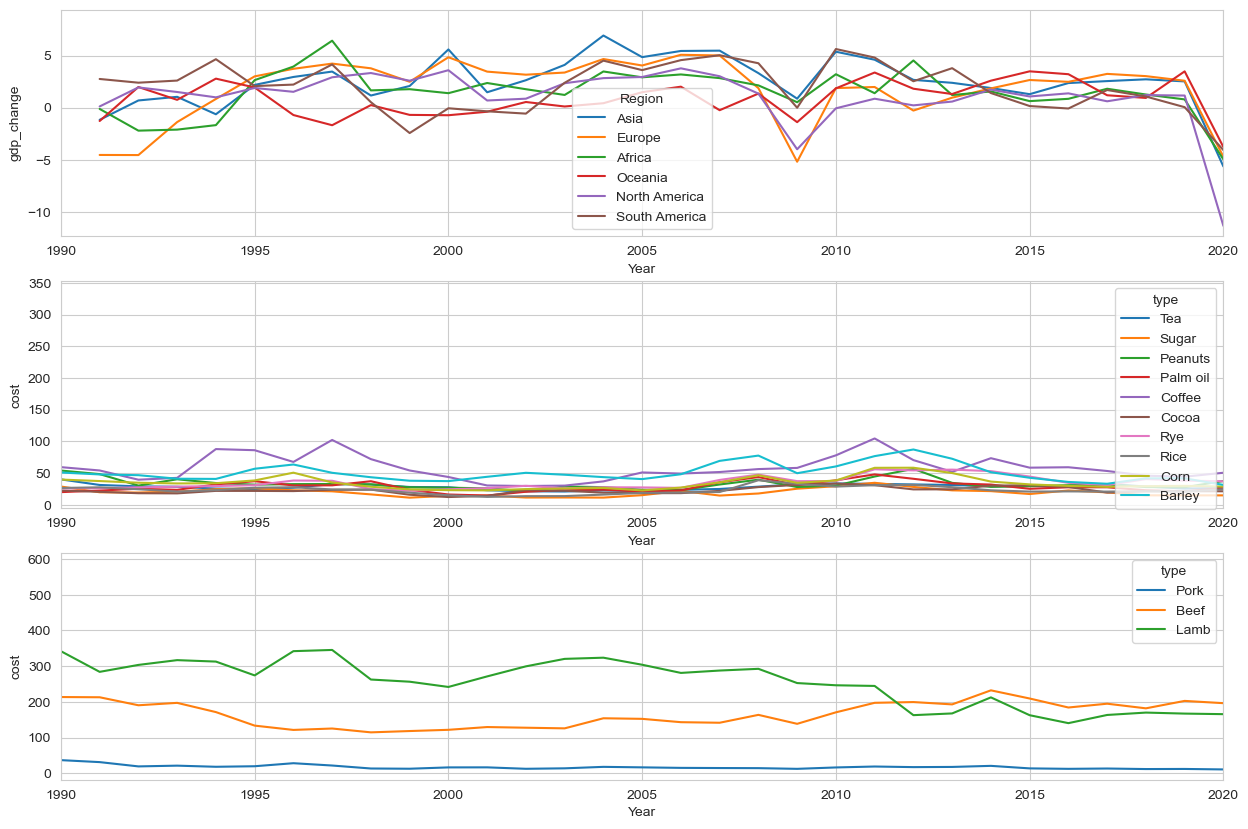

In [30]:
plt.figure(figsize=(15 ,10))
plt.subplot(3,1,1)
sns.lineplot(data=df, x='Year', y='gdp_change', hue='Region', errorbar=None)
plt.xlim((1990, 2020))

plt.subplot(3,1,2)
sns.lineplot(data=comm_crop, x='Year', y='cost', hue='type')
plt.xlim((1990, 2020))

plt.subplot(3,1,3)
sns.lineplot(data=comm_meat, x='Year', y='cost', hue='type')
plt.xlim((1990, 2020))


In [31]:
petrol= pd.read_csv("commodity-price-index-cereal-crops-and-petroleum/commodity-price-index-cereal-crops-and-petroleum.csv")
#petroleum index, with 1900 as reference, at 1900, these index set at 100
petrol = petrol[['Year', 'Petroleum']]
petrol = petrol[petrol['Year']>=1960]
petrol.head()


,Year,Petroleum
100,1960,147.22638
101,1961,145.75018
102,1962,144.11253
103,1963,142.41820
104,1964,139.35345


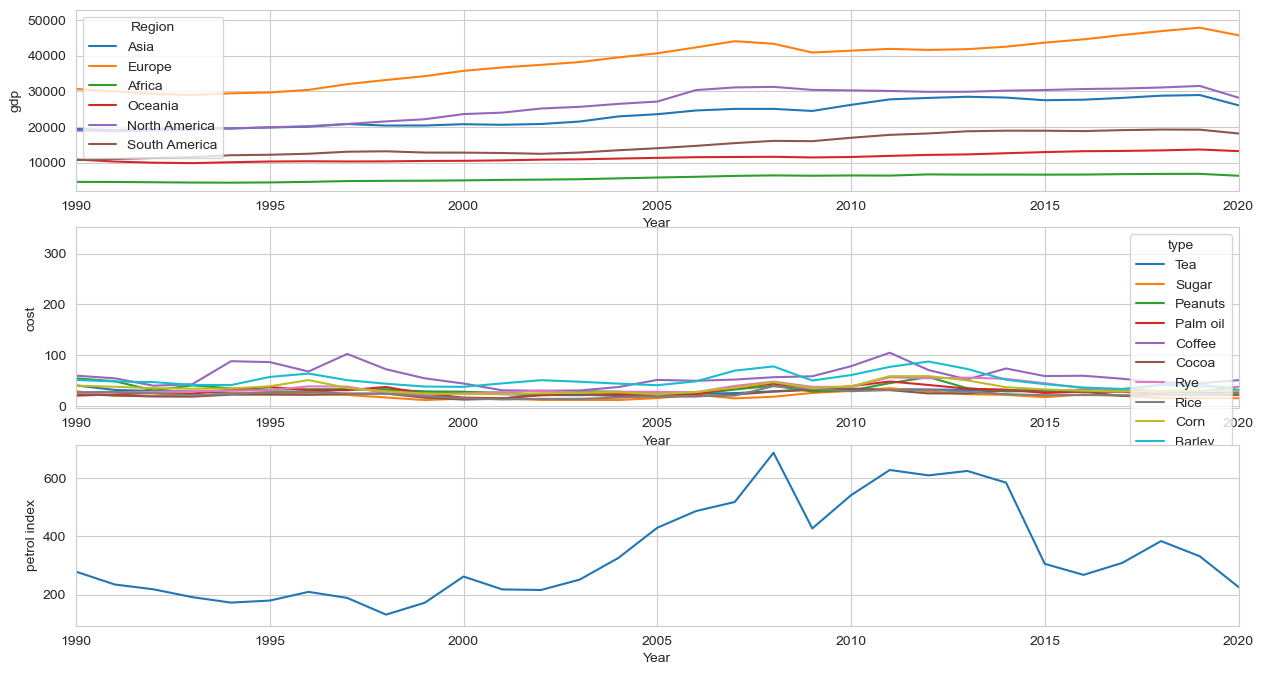

In [32]:
plt.figure(figsize=(15 ,8))
plt.subplot(3,1,1)
sns.lineplot(data=df, x='Year', y='gdp', hue='Region', errorbar=None)
plt.xlim((1990, 2020))

plt.subplot(3,1,2)
sns.lineplot(data=comm_crop, x='Year', y='cost', hue='type')
plt.xlim((1990, 2020))

plt.subplot(3,1,3)
pet_fig= sns.lineplot(data=petrol, x='Year', y='Petroleum')
plt.xlim((1990, 2020))
pet_fig.set(xlabel='Year', ylabel='petrol index')


plt.show()


In [33]:
ag_out= pd.read_csv("agricultural-output-dollars/agricultural-output-dollars.csv")
ag_out= ag_out[ag_out['Year']>=1960]

ag_out['Region']= ag_out['Entity'].map(region)
ag_out.head()


,Entity,Code,Year,output_quantity,Region
0,Afghanistan,AFG,1961,2566730000,Asia
1,Afghanistan,AFG,1962,2611942000,Asia
2,Afghanistan,AFG,1963,2632254000,Asia
3,Afghanistan,AFG,1964,2810010000,Asia
4,Afghanistan,AFG,1965,2932230000,Asia


<Axes: xlabel='Region', ylabel='output_quantity'>

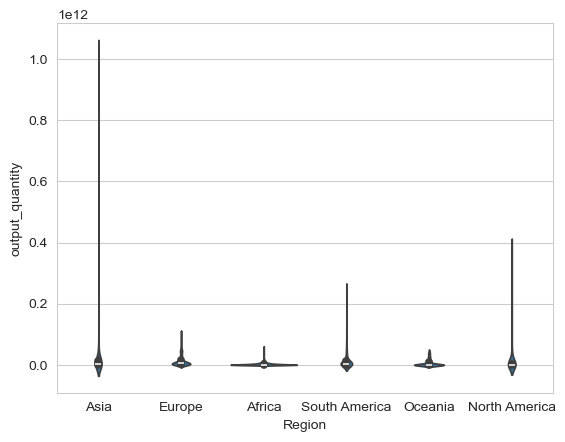

In [34]:
sns.violinplot(data=ag_out, x='Region', y='output_quantity')

(1990.0, 2020.0)

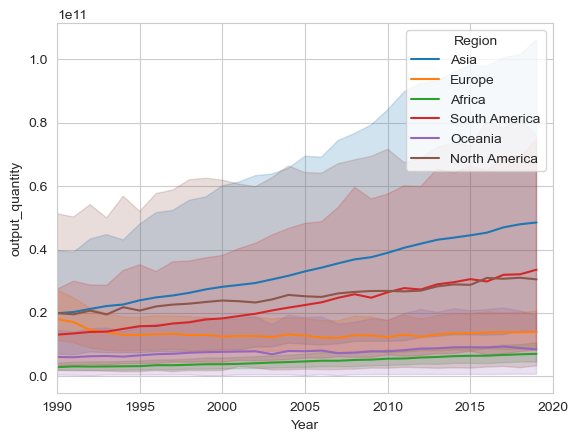

In [35]:
sns.lineplot(data=ag_out, x='Year', y='output_quantity', hue='Region')
plt.xlim((1990, 2020))


In [36]:
africa_ag= ag_out[ag_out['Region']=='Africa'].copy()
africa_ag

sum= africa_ag.groupby('Entity')['output_quantity'].describe()
sum.sort_values('mean')

,count,mean,std,min,25%,50%,75%,max
Entity,,,,,,,,
Sao Tome and Principe,59.0,2.870386e+07,6.711480e+06,1.729300e+07,2.261250e+07,2.866100e+07,3.506550e+07,4.247200e+07
Cape Verde,59.0,3.876868e+07,1.858697e+07,1.373100e+07,2.083850e+07,4.064700e+07,5.911550e+07,6.868400e+07
Djibouti,59.0,5.116041e+07,2.237673e+07,1.515100e+07,2.640750e+07,5.588300e+07,7.119600e+07,8.700600e+07
Equatorial Guinea,59.0,6.515324e+07,1.612746e+07,3.747500e+07,5.134550e+07,6.340500e+07,7.858700e+07,9.261600e+07
Comoros,59.0,6.783369e+07,2.032587e+07,3.798500e+07,4.954700e+07,6.576600e+07,8.618800e+07,9.656700e+07
Gambia,59.0,1.704043e+08,3.975505e+07,1.024810e+08,1.450730e+08,1.577640e+08,1.975325e+08,2.920720e+08
Lesotho,59.0,2.048103e+08,4.758378e+07,1.295980e+08,1.643615e+08,1.932790e+08,2.488450e+08,2.917810e+08
Guinea-Bissau,59.0,2.459452e+08,1.163776e+08,1.130620e+08,1.485300e+08,2.112480e+08,3.169740e+08,4.859800e+08
Gabon,59.0,2.967522e+08,1.103341e+08,1.415800e+08,1.863280e+08,2.894340e+08,3.650000e+08,5.135830e+08


In [37]:
africa_top= ['Nigeria', 'Egypt', 'South Africa','Sudan', 'Ethiopia', 'Morocco', 'Tanzania', 'Alheria', 'Kenya', 'Uganda']
africa_ag_top = africa_ag[africa_ag['Entity'].isin(africa_top)].copy()

africa_ag_top


,Entity,Code,Year,output_quantity,Region
3289,Egypt,EGY,1961,5762750000,Africa
3290,Egypt,EGY,1962,6856018000,Africa
3291,Egypt,EGY,1963,7083168000,Africa
3292,Egypt,EGY,1964,7109021000,Africa
3293,Egypt,EGY,1965,7234207000,Africa
...,...,...,...,...,...
11115,Uganda,UGA,2015,8775461000,Africa
11116,Uganda,UGA,2016,8056567000,Africa
11117,Uganda,UGA,2017,8536130000,Africa
11118,Uganda,UGA,2018,8632568000,Africa


[Text(0.5, 0, 'Year'), Text(0, 0.5, 'petrol index')]

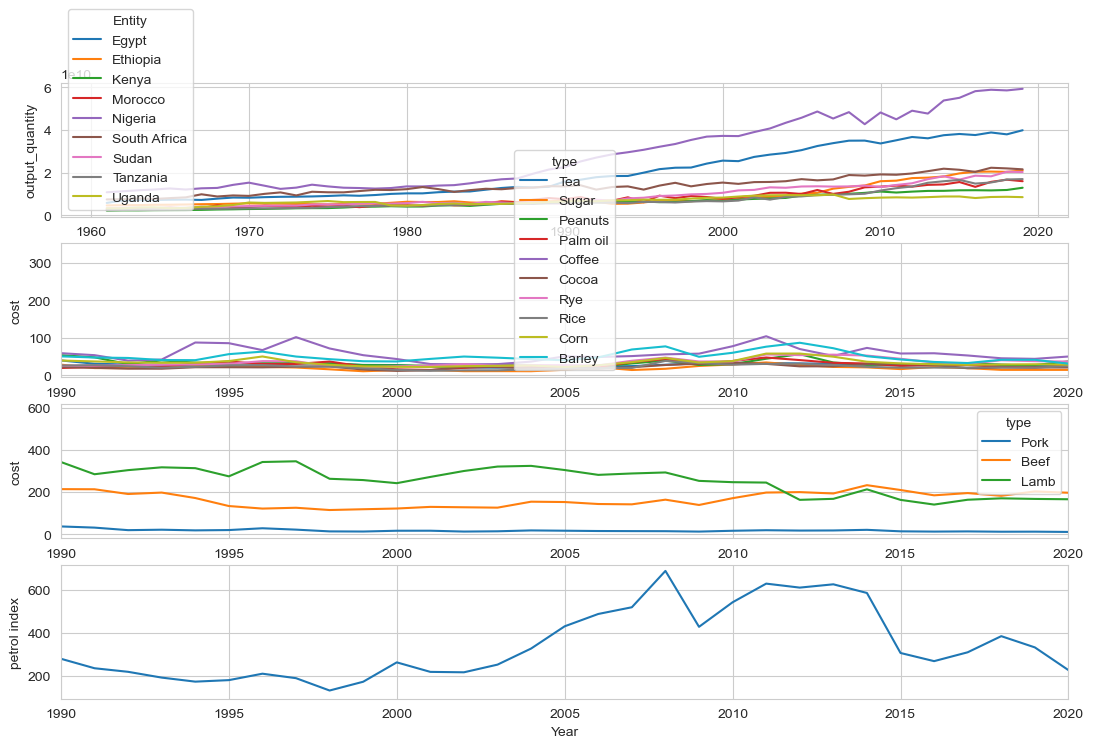

In [38]:
plt.figure(figsize=(13,8))
plt.subplot(4,1,1)
sns.lineplot(data=africa_ag_top, x='Year', y= 'output_quantity', hue='Entity')

plt.subplot(4,1,2)
sns.lineplot(data=comm_crop, x='Year', y='cost', hue='type')
plt.xlim((1990, 2020))

plt.subplot(4,1,3)
sns.lineplot(data=comm_meat, x='Year', y='cost', hue='type')
plt.xlim((1990, 2020))

plt.subplot(4,1,4)
pet_fig= sns.lineplot(data=petrol, x='Year', y='Petroleum')
plt.xlim((1990, 2020))
pet_fig.set(xlabel='Year', ylabel='petrol index')


In [39]:
## unemployment
employ = pd.read_csv("unemployment-rate/unemployment-rate.csv")
employ.head()

,Entity,Code,Year,"Unemployment, total (% of total labor force) (modeled ILO estimate)"
0,Afghanistan,AFG,1991,7.946
1,Afghanistan,AFG,1992,7.940
2,Afghanistan,AFG,1993,7.961
3,Afghanistan,AFG,1994,7.980
4,Afghanistan,AFG,1995,7.967


In [40]:
employ['Region']= employ['Entity'].map(region)
employ['unemployed']=employ["Unemployment, total (% of total labor force) (modeled ILO estimate)"].copy()

In [41]:
employ['unemp_change'] = employ.groupby('Entity')['unemployed'].pct_change()*100

In [42]:
## economic inequality (GINI index)
gini= pd.read_csv("gini-coefficient.csv")
gini = gini[gini['Year']>=1960]
gini['Region'] = gini['Country'].map(region)
gini['gini']= gini['Gini coefficient (before tax) (World Inequality Database)']
gini['gini_change'] = gini.groupby('Country')['gini'].pct_change()*100

gini.head()

C:\Users\felic\AppData\Local\Temp\ipykernel_29300\2993132241.py:6: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  gini['gini_change'] = gini.groupby('Country')['gini'].pct_change()*100


,Country,Year,Gini coefficient (before tax) (World Inequality Database),Region,gini,gini_change
0,Afghanistan,1980,NaN,Asia,NaN,NaN
1,Afghanistan,1981,NaN,Asia,NaN,NaN
2,Afghanistan,1982,NaN,Asia,NaN,NaN
3,Afghanistan,1983,NaN,Asia,NaN,NaN
4,Afghanistan,1984,NaN,Asia,NaN,NaN


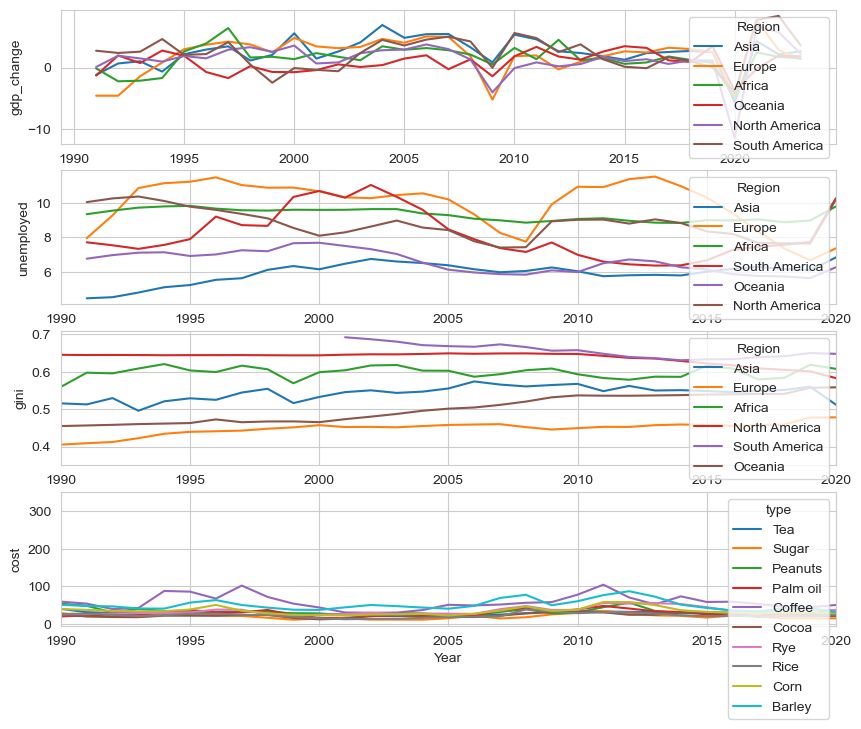

In [43]:
plt.figure(figsize=(10,8))
plt.subplot(4,1,1)
gdp=sns.lineplot(data=df, x='Year', y= 'gdp_change', hue='Region', errorbar=None)
sns.move_legend(gdp, 'upper right')

plt.subplot(4,1,2)
emp= sns.lineplot(data=employ, x='Year', y='unemployed', hue='Region', errorbar=None)
plt.xlim((1990, 2020))
sns.move_legend(emp, 'upper right')

plt.subplot(4,1,3)
ineq= sns.lineplot(data=gini, x='Year', y='gini', hue='Region', errorbar=None)
plt.xlim((1990, 2020))
sns.move_legend(ineq, 'upper right')

plt.subplot(4,1,4)
co=sns.lineplot(data=comm_crop, x='Year', y='cost', hue='type')
plt.xlim((1990, 2020))
sns.move_legend(co, 'upper right')



In [44]:
##key crop yields

crop_y= pd.read_csv("key-crop-yields/key-crop-yields.csv")
crop_y.columns

def colstrip(t):
    out= t.split(" ")
    return out[0]

crop_col_d= {}
for i in crop_y.columns:
    crop_col_d[i] = colstrip(i)

crop_y = crop_y.rename(columns= crop_col_d)

crop_y = crop_y[crop_y['Year']>=1990]

crop_y['Region']= crop_y.Entity.map(region)
crop_y.head()

,Entity,Code,Year,Wheat,Rice,Bananas,Maize,Soybeans,Potatoes,"Beans,","Peas,",Cassava,Cocoa,Barley,Region
29,Afghanistan,AFG,1990,1.0510,1.9029,NaN,1.7582,NaN,16.8421,NaN,NaN,NaN,NaN,1.0537,Asia
30,Afghanistan,AFG,1991,1.0213,1.9364,NaN,1.6800,NaN,16.6418,NaN,NaN,NaN,NaN,1.0637,Asia
31,Afghanistan,AFG,1992,1.0313,1.7143,NaN,1.5000,NaN,16.6667,NaN,NaN,NaN,NaN,0.8000,Asia
32,Afghanistan,AFG,1993,1.0211,1.7143,NaN,1.6786,NaN,16.6912,NaN,NaN,NaN,NaN,1.0000,Asia
33,Afghanistan,AFG,1994,1.0250,1.9000,NaN,1.6667,NaN,16.5942,NaN,NaN,NaN,NaN,0.9200,Asia


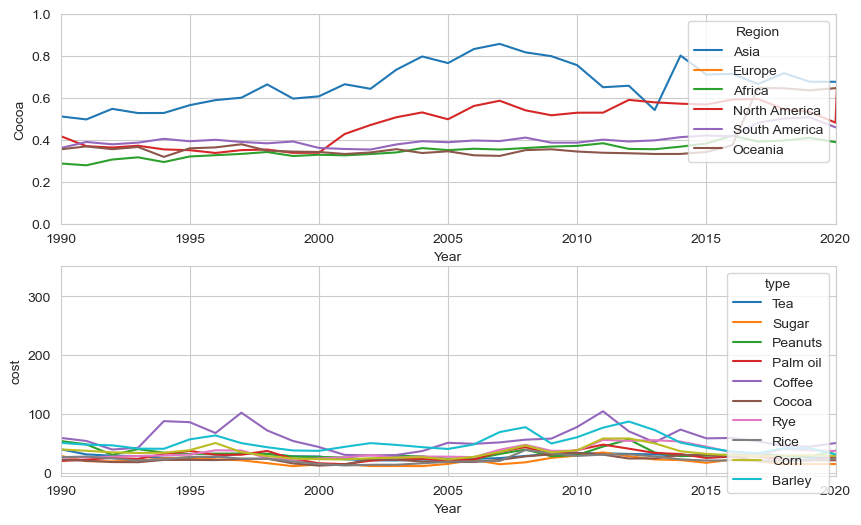

In [45]:
plt.figure(figsize= (10,6))
plt.subplot(2,1,1)
ax= sns.lineplot(data=crop_y, x= 'Year', y='Cocoa', hue='Region', errorbar=None)
sns.move_legend(ax, 'upper right')

plt.xlim(1990, 2020)
plt.ylim(0, 1.0)

plt.subplot(2,1,2)
az= sns.lineplot(data=comm_crop, x='Year', y='cost', hue='type')
plt.xlim((1990, 2020))
sns.move_legend(az, 'upper right')


In [46]:
## merge datasets
df.columns
ag=df[['Country', 'Code', 'Year', 'agr_pct', 'gdp', 'gdp_change', 'pop']].copy()

ag_df = pd.merge(ag, employ, on=['Code', 'Year'])
ag_df


,Country,Code,Year,agr_pct,gdp,gdp_change,pop,Entity,"Unemployment, total (% of total labor force) (modeled ILO estimate)",Region,unemployed,unemp_change
0,Afghanistan,AFG,1991,NaN,NaN,NaN,12238879.0,Afghanistan,7.946,Asia,7.946,NaN
1,Afghanistan,AFG,1992,NaN,NaN,NaN,13278982.0,Afghanistan,7.940,Asia,7.940,-0.075510
2,Afghanistan,AFG,1993,NaN,NaN,NaN,14943174.0,Afghanistan,7.961,Asia,7.961,0.264484
3,Afghanistan,AFG,1994,NaN,NaN,NaN,16250799.0,Afghanistan,7.980,Asia,7.980,0.238663
4,Afghanistan,AFG,1995,NaN,NaN,NaN,17065836.0,Afghanistan,7.967,Asia,7.967,-0.162907
...,...,...,...,...,...,...,...,...,...,...,...,...
19132,Zimbabwe,ZWE,2019,9.819262,3294.8062,-7.785577,15271377.0,Zimbabwe,7.373,Africa,7.373,8.554181
19133,Zimbabwe,ZWE,2020,8.772859,2987.2698,-9.333975,15526888.0,Zimbabwe,8.621,Africa,8.621,16.926624
19134,Zimbabwe,ZWE,2021,8.849899,3184.7854,6.611910,15797220.0,Zimbabwe,9.540,Africa,9.540,10.660016
19135,Zimbabwe,ZWE,2022,7.170550,3323.1218,4.343665,16069061.0,Zimbabwe,10.087,Africa,10.087,5.733753


In [47]:
fulldf= pd.merge(ag_df, gini, on=['Country', 'Year'])
fulldf.head()


,Country,Code,Year,agr_pct,gdp,gdp_change,pop,Entity,"Unemployment, total (% of total labor force) (modeled ILO estimate)",Region_x,unemployed,unemp_change,Gini coefficient (before tax) (World Inequality Database),Region_y,gini,gini_change
0,Afghanistan,AFG,1991,NaN,NaN,NaN,12238879.0,Afghanistan,7.946,Asia,7.946,NaN,NaN,Asia,NaN,NaN
1,Afghanistan,AFG,1992,NaN,NaN,NaN,13278982.0,Afghanistan,7.940,Asia,7.940,-0.075510,NaN,Asia,NaN,NaN
2,Afghanistan,AFG,1993,NaN,NaN,NaN,14943174.0,Afghanistan,7.961,Asia,7.961,0.264484,NaN,Asia,NaN,NaN
3,Afghanistan,AFG,1994,NaN,NaN,NaN,16250799.0,Afghanistan,7.980,Asia,7.980,0.238663,NaN,Asia,NaN,NaN
4,Afghanistan,AFG,1995,NaN,NaN,NaN,17065836.0,Afghanistan,7.967,Asia,7.967,-0.162907,NaN,Asia,NaN,NaN


<Figure size 1200x500 with 0 Axes>

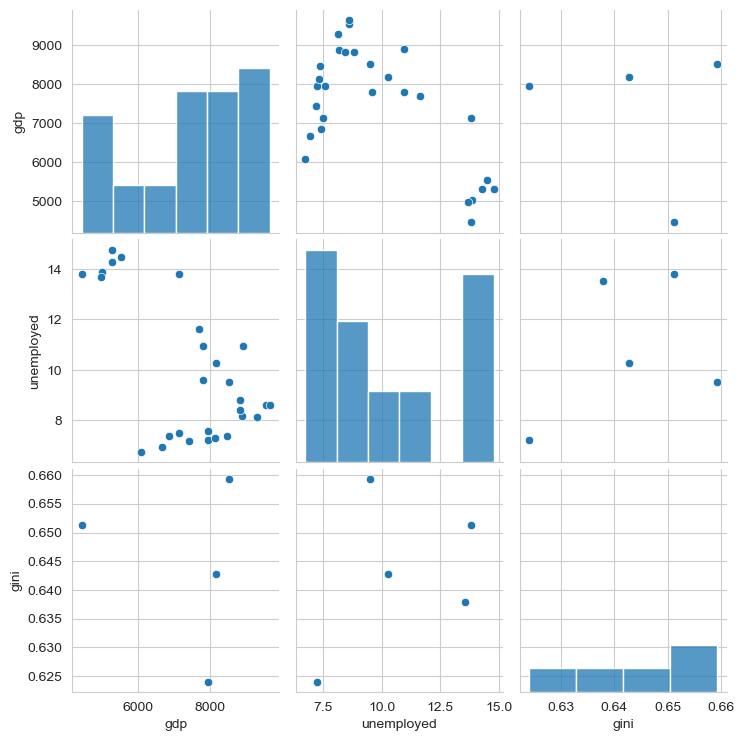

In [48]:
plt.figure(figsize=(12,5))
sns.pairplot(data= fulldf[fulldf['Country']=='Syria'], x_vars= ['gdp', 'unemployed', 'gini'], y_vars = ['gdp', 'unemployed', 'gini'])

<Figure size 1200x500 with 0 Axes>

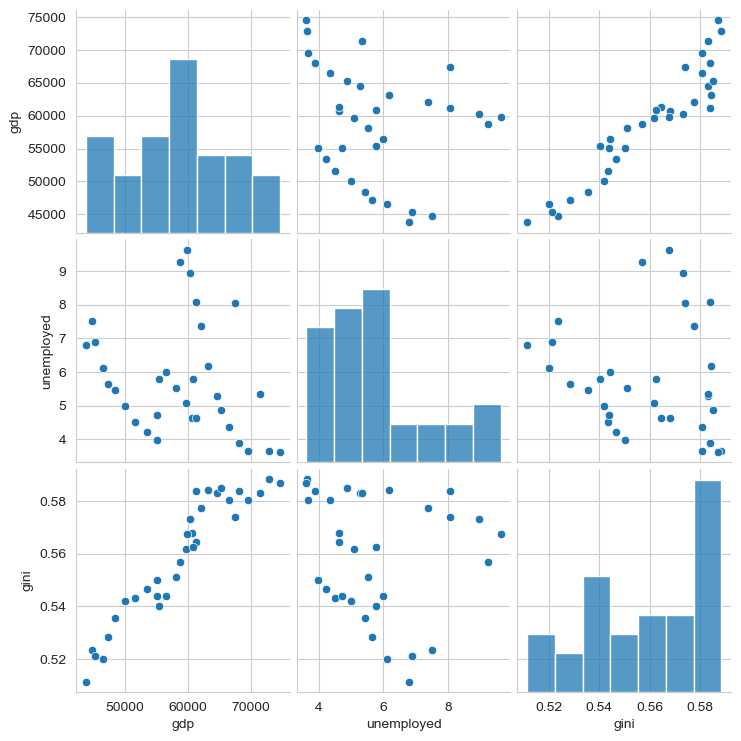

In [49]:
plt.figure(figsize=(12,5))
sns.pairplot(data= fulldf[fulldf['Country']=='United States'], x_vars= ['gdp', 'unemployed', 'gini'], y_vars = ['gdp', 'unemployed', 'gini'])

<Figure size 1200x500 with 0 Axes>

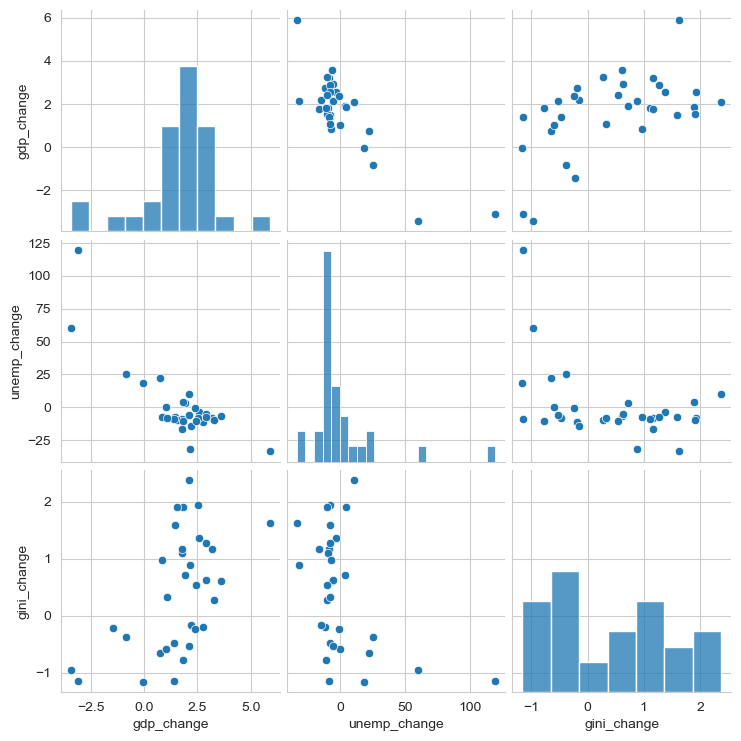

In [50]:
plt.figure(figsize=(12,5))
sns.pairplot(data= fulldf[fulldf['Country']=='United States'], x_vars= ['gdp_change', 'unemp_change', 'gini_change'], y_vars = ['gdp_change', 'unemp_change', 'gini_change'])

<Axes: xlabel='Year', ylabel='gdp_change'>

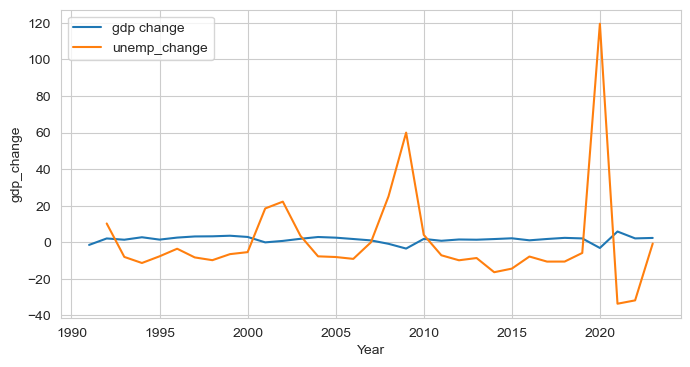

In [51]:
plt.figure(figsize=(8,4))
sns.lineplot(data=fulldf[fulldf['Country']=='United States'], x='Year', y='gdp_change', legend='auto', label='gdp change')
sns.lineplot(data=fulldf[fulldf['Country']=='United States'], x='Year', y='unemp_change', legend='auto', label='unemp_change')


In [52]:
## select countries based on their ag output

all_reg = ag_out.Entity.unique()
avg_d={}
for c in all_reg:
    avg_d[c] = ag_out[ag_out['Entity']==c]['output_quantity'].mean()

avg_ag=pd.DataFrame({'Country':[i for i in avg_d.keys()], 'avg_ag': [y for y in avg_d.values()]})
avg_ag.head()

,Country,avg_ag
0,Afghanistan,4.092598e+09
1,Albania,1.177106e+09
2,Algeria,6.087515e+09
3,Angola,2.399971e+09
4,Argentina,4.198609e+10


In [53]:
avg_ag['Region'] = avg_ag['Country'].map(region)
rand_s = avg_ag.groupby('Region', group_keys=False).apply(lambda x: x.sample(frac=0.08, random_state=316))
rand_s

C:\Users\felic\AppData\Local\Temp\ipykernel_29300\3480589007.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  rand_s = avg_ag.groupby('Region', group_keys=False).apply(lambda x: x.sample(frac=0.08, random_state=316))


,Country,avg_ag,Region
29,Cape Verde,3.876868e+07,Africa
134,Niger,2.338093e+09,Africa
160,Rwanda,1.855999e+09,Africa
16,Benin,1.610395e+09,Africa
95,Japan,2.903417e+10,Asia
89,Iran,2.234530e+10,Asia
88,Indonesia,5.028875e+10,Asia
9,Azerbaijan,3.103626e+09,Asia
142,Norway,3.826360e+09,Europe
67,Finland,3.180973e+09,Europe


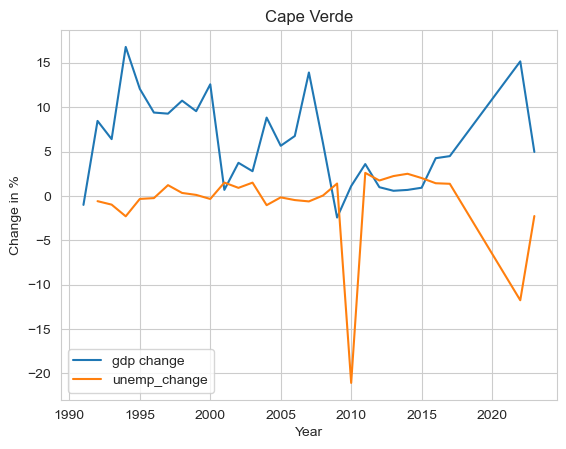

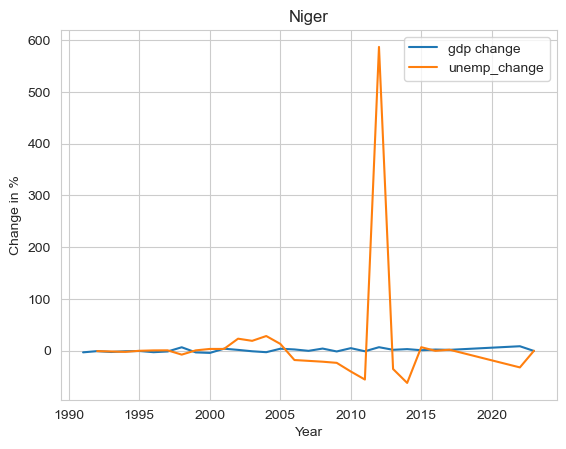

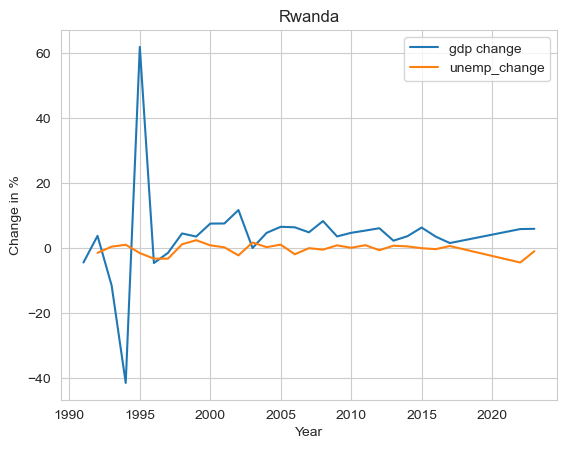

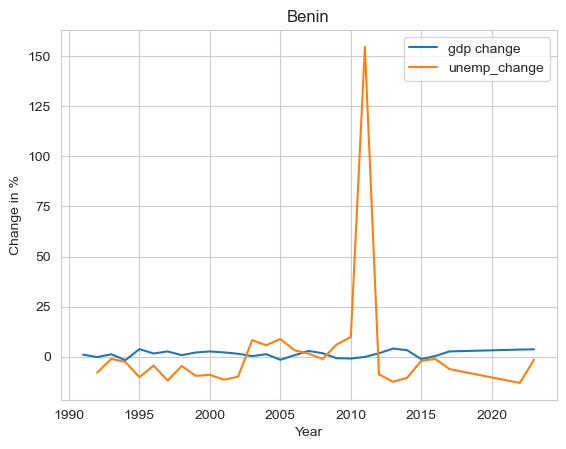

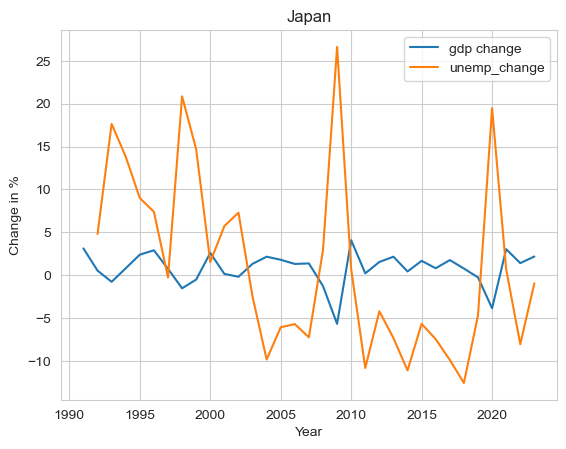

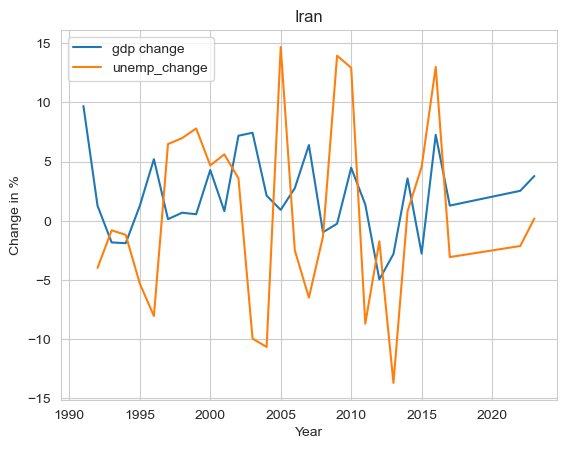

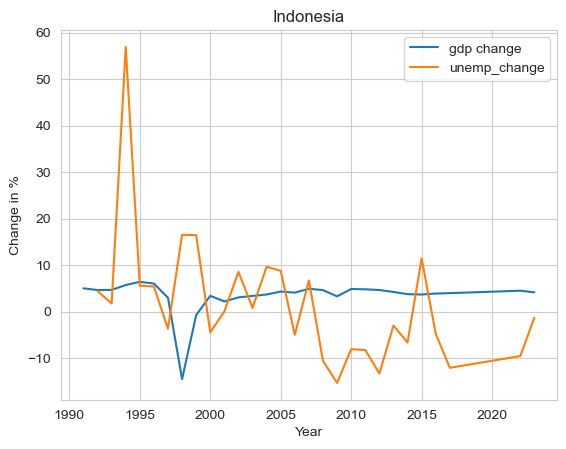

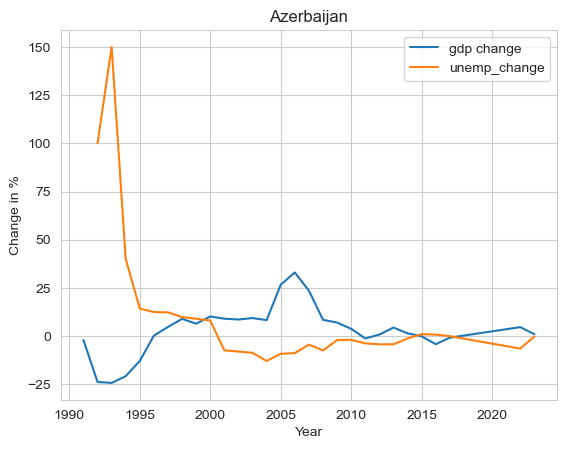

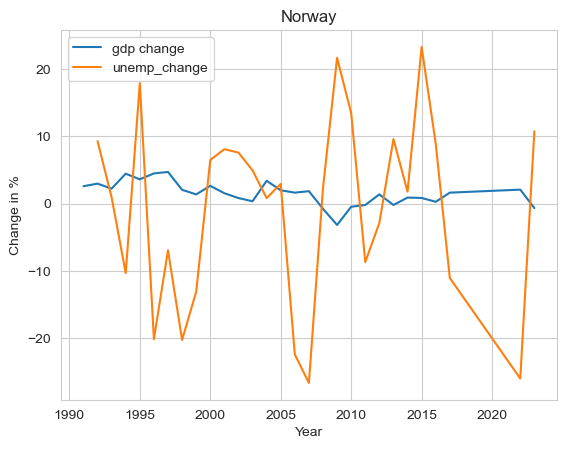

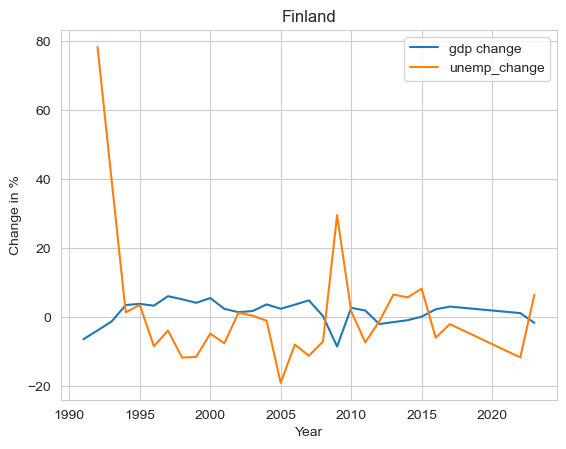

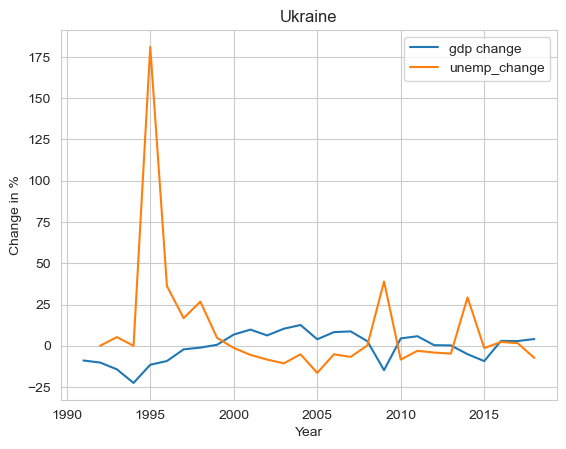

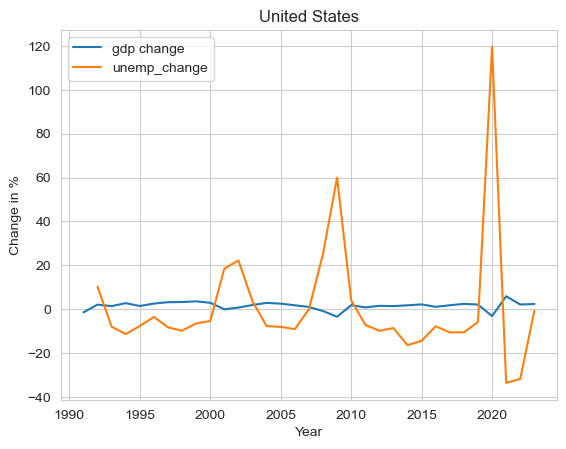

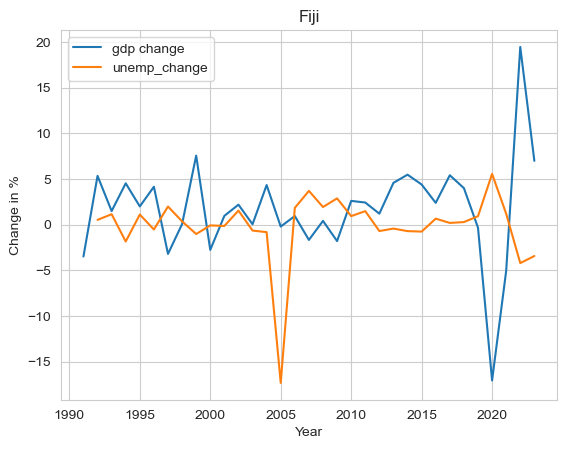

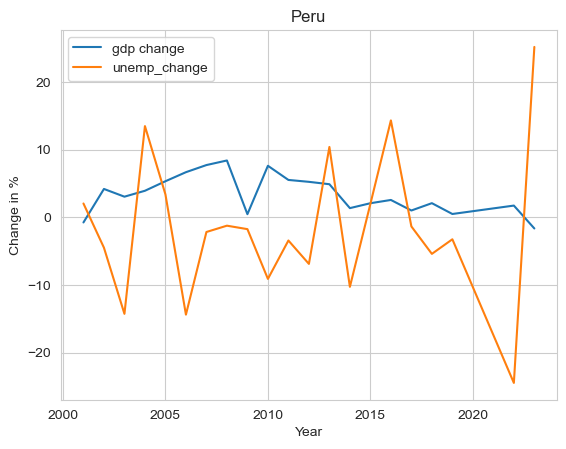

In [54]:
select_country= [i for i in rand_s['Country']]

for country in select_country:

    fig= sns.lineplot(data=fulldf[fulldf['Country']==country], x='Year', y='gdp_change', legend='auto', label='gdp change')
    fig= sns.lineplot(data=fulldf[fulldf['Country']==country], x='Year', y='unemp_change', legend='auto', label='unemp_change')
    fig.set_title(country)
    fig.set(xlabel='Year', ylabel='Change in %')

    plt.show()


# Join multiple datasets, focusing on gdp, unemployment, gini

## GDP

In [1]:
import sys

sys.path.insert(1, '../rainfall')

In [2]:
from csv_fetcher import CsvFetcher
from missing_value_handler import add_missing_years, fill_na

In [290]:
# Fetch the data [multiple gdp datasets]
df = pd.read_csv("https://ourworldindata.org/grapher/value-added-in-the-agricultural-sector-as-of-gdp-vs-gdp-per-capita.csv?v=1&csvType=full&useColumnShortNames=true", storage_options = {'User-Agent': 'Our World In Data data fetch/1.0'})
gdp = pd.read_csv("https://ourworldindata.org/grapher/gdp-worldbank-constant-usd.csv?v=1&csvType=full&useColumnShortNames=true", storage_options = {'User-Agent': 'Our World In Data data fetch/1.0'})


In [291]:
#df has population info and gdp per capita (controlled for living costs in constant international $)
df.columns

Index(['Entity', 'Code', 'Year', 'nv_agr_totl_zs', 'ny_gdp_pcap_pp_kd',
       'population_historical', 'owid_region'],
      dtype='object')

In [292]:
df=df[df['Year']>=1960]
df= df[df['Code'].notna()]


In [293]:
#create dictionary between entity and code
country = dict(zip(df.Code, df.Entity))
country

{'AFG': 'Afghanistan',
 'OWID_AKD': 'Akrotiri and Dhekelia',
 'ALA': 'Aland Islands',
 'ALB': 'Albania',
 'DZA': 'Algeria',
 'ASM': 'American Samoa',
 'AND': 'Andorra',
 'AGO': 'Angola',
 'AIA': 'Anguilla',
 'ATG': 'Antigua and Barbuda',
 'ARG': 'Argentina',
 'ARM': 'Armenia',
 'ABW': 'Aruba',
 'AUS': 'Australia',
 'AUT': 'Austria',
 'OWID_AUH': 'Austria-Hungary',
 'AZE': 'Azerbaijan',
 'BHS': 'Bahamas',
 'BHR': 'Bahrain',
 'BGD': 'Bangladesh',
 'BRB': 'Barbados',
 'BLR': 'Belarus',
 'BEL': 'Belgium',
 'BLZ': 'Belize',
 'BEN': 'Benin',
 'BMU': 'Bermuda',
 'BTN': 'Bhutan',
 'BOL': 'Bolivia',
 'BES': 'Bonaire Sint Eustatius and Saba',
 'BIH': 'Bosnia and Herzegovina',
 'BWA': 'Botswana',
 'BRA': 'Brazil',
 'IOT': 'British Indian Ocean Territory',
 'VGB': 'British Virgin Islands',
 'BRN': 'Brunei',
 'BGR': 'Bulgaria',
 'BFA': 'Burkina Faso',
 'BDI': 'Burundi',
 'KHM': 'Cambodia',
 'CMR': 'Cameroon',
 'CAN': 'Canada',
 'CPV': 'Cape Verde',
 'CYM': 'Cayman Islands',
 'CAF': 'Central African

In [294]:
gdp_pp= df[['Entity', 'Code', 'Year', 'ny_gdp_pcap_pp_kd','population_historical']].copy()

In [295]:
gdp_pp = add_missing_years(gdp_pp)


In [296]:
gdp_pp.sort_values(by=['Code', 'Year'])

,Entity,Code,Year,ny_gdp_pcap_pp_kd,population_historical
2822,Aruba,ABW,1960,NaN,54938.0
2823,Aruba,ABW,1961,NaN,55596.0
2824,Aruba,ABW,1962,NaN,56335.0
2825,Aruba,ABW,1963,NaN,57018.0
2826,Aruba,ABW,1964,NaN,57637.0
...,...,...,...,...,...
59440,Zimbabwe,ZWE,2019,3294.8062,15271377.0
59441,Zimbabwe,ZWE,2020,2987.2698,15526888.0
59442,Zimbabwe,ZWE,2021,3184.7854,15797220.0
59443,Zimbabwe,ZWE,2022,3323.1218,16069061.0


In [297]:
#add on country names, remove entity columns
gdp_pp['Country'] = gdp_pp['Code'].map(country)
gdp_pp = gdp_pp.drop('Entity', axis=1)



In [298]:
gdp_pp.Code.nunique()
gdp_pp.columns

Index(['Code', 'Year', 'ny_gdp_pcap_pp_kd', 'population_historical',
       'Country'],
      dtype='object')

In [299]:
gdp_pp.Code.unique()

array(['AFG', 'OWID_AKD', 'ALA', 'ALB', 'DZA', 'ASM', 'AND', 'AGO', 'AIA',
       'ATG', 'ARG', 'ARM', 'ABW', 'AUS', 'AUT', 'OWID_AUH', 'AZE', 'BHS',
       'BHR', 'BGD', 'BRB', 'BLR', 'BEL', 'BLZ', 'BEN', 'BMU', 'BTN',
       'BOL', 'BES', 'BIH', 'BWA', 'BRA', 'IOT', 'VGB', 'BRN', 'BGR',
       'BFA', 'BDI', 'KHM', 'CMR', 'CAN', 'CPV', 'CYM', 'CAF', 'TCD',
       'OWID_CIS', 'CHL', 'CHN', 'CXR', 'CCK', 'COL', 'COM', 'COG', 'COK',
       'CRI', 'CIV', 'HRV', 'CUB', 'CUW', 'CYP', 'CZE', 'OWID_CZS', 'COD',
       'DNK', 'DJI', 'DMA', 'DOM', 'OWID_GDR', 'TLS', 'ECU', 'EGY', 'SLV',
       'GNQ', 'ERI', 'EST', 'SWZ', 'ETH', 'OWID_ERE', 'FLK', 'FRO', 'FJI',
       'FIN', 'FRA', 'GUF', 'PYF', 'GAB', 'GMB', 'GEO', 'DEU', 'GHA',
       'GIB', 'GRC', 'GRL', 'GRD', 'GLP', 'GUM', 'GTM', 'GGY', 'GIN',
       'GNB', 'GUY', 'HTI', 'HND', 'HKG', 'HUN', 'ISL', 'IND', 'IDN',
       'IRN', 'IRQ', 'IRL', 'IMN', 'ISR', 'ITA', 'JAM', 'JPN', 'JEY',
       'JOR', 'KAZ', 'KEN', 'KIR', 'OWID_KRU', 'OWID_KOS', '

In [304]:
#fill missing rows using the minimum method

for country in gdp_pp['Code'].unique():
    fill_na(gdp_pp, 'ny_gdp_pcap_pp_kd', 'Code', country, method='min')

In [305]:
#some codes don't have any data at all, leave them for now
code_to_remove=[]
for country in gdp_pp['Code'].unique():
    min = gdp_pp[gdp_pp['Code']==country].groupby('Code')['ny_gdp_pcap_pp_kd'].min()
    if min.isna().all():
        code_to_remove.append(country)

code_to_remove

['OWID_AKD',
 'ALA',
 'ASM',
 'AIA',
 'OWID_AUH',
 'BES',
 'IOT',
 'VGB',
 'OWID_CIS',
 'CXR',
 'CCK',
 'COK',
 'CUB',
 'OWID_CZS',
 'OWID_GDR',
 'ERI',
 'OWID_ERE',
 'FLK',
 'FRO',
 'GUF',
 'PYF',
 'GIB',
 'GLP',
 'GUM',
 'GGY',
 'IMN',
 'JEY',
 'OWID_KRU',
 'LIE',
 'MTQ',
 'MYT',
 'MCO',
 'MSR',
 'ANT',
 'NCL',
 'NIU',
 'NFK',
 'PRK',
 'MNP',
 'PCN',
 'OWID_RVN',
 'REU',
 'BLM',
 'SHN',
 'MAF',
 'SPM',
 'OWID_SRM',
 'SGS',
 'SSD',
 'SJM',
 'TWN',
 'TKL',
 'OWID_USS',
 'VAT',
 'VEN',
 'WLF',
 'OWID_GFR',
 'ESH',
 'YEM',
 'OWID_YAR',
 'OWID_YPR',
 'OWID_YGS']

In [306]:
gdp_pp = gdp_pp.rename(columns={'ny_gdp_pcap_pp_kd': 'gdp_percap', 'population_historical': 'pop'})
gdp_pp.sample(10)

,Code,Year,gdp_percap,pop,Country
21441,GUM,1965,NaN,78946.0,Guam
10129,CAF,1983,996.89636,2537409.0,Central African Republic
610,ALB,2002,7565.82130,3134094.0,Albania
11186,COL,1961,10178.37000,16095207.0,Colombia
14242,DJI,1966,4446.41360,115284.0,Djibouti
35208,MNE,2021,24509.93600,603854.0,Montenegro
28937,LBN,2000,11571.73200,4329344.0,Lebanon
16680,EST,1962,14154.64200,1249634.0,Estonia
31417,MDG,1990,1975.14660,12055648.0,Madagascar
52521,TZA,1997,1755.80370,31578094.0,Tanzania


In [307]:
gdp_pp.loc[gdp_pp['gdp_percap'].isna()]

,Code,Year,gdp_percap,pop,Country
601,OWID_AKD,2005,NaN,15700.0,Akrotiri and Dhekelia
602,OWID_AKD,2008,NaN,15700.0,Akrotiri and Dhekelia
603,ALA,2023,NaN,NaN,Aland Islands
1178,ASM,1960,NaN,20158.0,American Samoa
1179,ASM,1961,NaN,20686.0,American Samoa
...,...,...,...,...,...
0,OWID_YGS,2018,NaN,NaN,Yugoslavia
0,OWID_YGS,2019,NaN,NaN,Yugoslavia
0,OWID_YGS,2020,NaN,NaN,Yugoslavia
0,OWID_YGS,2021,NaN,NaN,Yugoslavia


In [308]:
gdp = gdp[gdp['Year']>=1960]
gdp= gdp[gdp['Code'].notna()]

gdp.head()

,Entity,Code,Year,ny_gdp_mktp_kd
0,Afghanistan,AFG,2000,6.206548e+09
1,Afghanistan,AFG,2001,5.621148e+09
2,Afghanistan,AFG,2002,7.228796e+09
3,Afghanistan,AFG,2003,7.867264e+09
4,Afghanistan,AFG,2004,7.978516e+09


In [309]:
country2 = dict(zip(gdp.Code, gdp.Entity))
country2

{'AFG': 'Afghanistan',
 'ALB': 'Albania',
 'DZA': 'Algeria',
 'ASM': 'American Samoa',
 'AND': 'Andorra',
 'AGO': 'Angola',
 'ATG': 'Antigua and Barbuda',
 'ARG': 'Argentina',
 'ARM': 'Armenia',
 'ABW': 'Aruba',
 'AUS': 'Australia',
 'AUT': 'Austria',
 'AZE': 'Azerbaijan',
 'BHS': 'Bahamas',
 'BHR': 'Bahrain',
 'BGD': 'Bangladesh',
 'BRB': 'Barbados',
 'BLR': 'Belarus',
 'BEL': 'Belgium',
 'BLZ': 'Belize',
 'BEN': 'Benin',
 'BMU': 'Bermuda',
 'BTN': 'Bhutan',
 'BOL': 'Bolivia',
 'BIH': 'Bosnia and Herzegovina',
 'BWA': 'Botswana',
 'BRA': 'Brazil',
 'BRN': 'Brunei',
 'BGR': 'Bulgaria',
 'BFA': 'Burkina Faso',
 'BDI': 'Burundi',
 'KHM': 'Cambodia',
 'CMR': 'Cameroon',
 'CAN': 'Canada',
 'CPV': 'Cape Verde',
 'CYM': 'Cayman Islands',
 'CAF': 'Central African Republic',
 'TCD': 'Chad',
 'OWID_CIS': 'Channel Islands',
 'CHL': 'Chile',
 'CHN': 'China',
 'COL': 'Colombia',
 'COM': 'Comoros',
 'COG': 'Congo',
 'CRI': 'Costa Rica',
 'CIV': "Cote d'Ivoire",
 'HRV': 'Croatia',
 'CUB': 'Cuba',
 '

In [310]:
gdp = add_missing_years(gdp, min_year=1960,
                       max_year=2023,
                       year_name='Year',
                       ref_column='Code')



In [311]:
gdp['Country'] = gdp['Code'].map(country2)

In [312]:
gdp = gdp.drop('Entity', axis=1)

for country in gdp['Code'].unique():
    fill_na(gdp, 'ny_gdp_mktp_kd', 'Code', country, method='min')

gdp = gdp.sort_values(by=['Code', 'Year'])

In [313]:
gdp.sample(10)

,Code,Year,ny_gdp_mktp_kd,Country
10105,KOR,2008,1.171773e+12,South Korea
7457,MOZ,1995,3.385009e+09,Mozambique
7431,MAR,2013,1.030153e+11,Morocco
10073,KOR,1976,1.160872e+11,South Korea
2026,CHL,1971,4.441784e+10,Chile
9841,SLB,2000,7.698213e+08,Solomon Islands
2283,COG,1992,5.912376e+09,Congo
9578,SYC,1992,6.720897e+08,Seychelles
0,VUT,1961,2.950369e+08,Vanuatu
7400,MAR,1982,2.809028e+10,Morocco


## ag_share

In [314]:
ag_share = CsvFetcher('https://ourworldindata.org/grapher/agriculture-share-gdp.csv?v=1&csvType=full&useColumnShortNames=true')
agricultural_share = ag_share.fetch()

agricultural_share

,Entity,Code,Year,nv_agr_totl_zs
0,Afghanistan,AFG,2002,38.627890
1,Afghanistan,AFG,2003,37.418854
2,Afghanistan,AFG,2004,29.721067
3,Afghanistan,AFG,2005,31.114855
4,Afghanistan,AFG,2006,28.635970
...,...,...,...,...
9349,Zimbabwe,ZWE,2019,9.819262
9350,Zimbabwe,ZWE,2020,8.772859
9351,Zimbabwe,ZWE,2021,8.849899
9352,Zimbabwe,ZWE,2022,7.170550


In [315]:
iso_name = agricultural_share.copy()
iso_name = iso_name[['Entity', 'Code']].drop_duplicates(ignore_index=True)
iso_name

,Entity,Code
0,Afghanistan,AFG
1,Albania,ALB
2,Algeria,DZA
3,Andorra,AND
4,Angola,AGO
...,...,...
215,Vietnam,VNM
216,World,OWID_WRL
217,Yemen,YEM
218,Zambia,ZMB


In [316]:
agricultural_share[agricultural_share.isna().any(axis=1)]

#remove non-countries
agricultural_share.dropna(inplace=True)

agricultural_share

,Entity,Code,Year,nv_agr_totl_zs
0,Afghanistan,AFG,2002,38.627890
1,Afghanistan,AFG,2003,37.418854
2,Afghanistan,AFG,2004,29.721067
3,Afghanistan,AFG,2005,31.114855
4,Afghanistan,AFG,2006,28.635970
...,...,...,...,...
9349,Zimbabwe,ZWE,2019,9.819262
9350,Zimbabwe,ZWE,2020,8.772859
9351,Zimbabwe,ZWE,2021,8.849899
9352,Zimbabwe,ZWE,2022,7.170550


In [317]:
# get # of unique countries
agricultural_share['Entity'].nunique()

206

In [318]:
#fill in missing years for every country, using column 'Code' 
agricultural_share = add_missing_years(agricultural_share,
                                       min_year=1960,
                                       max_year=2023,
                                       year_name='Year',
                                       ref_column='Code')

In [320]:
#add country names back into the df by mapping dictionary
agricultural_share['Country']= agricultural_share['Code'].map(country2)
agricultural_share

,Entity,Code,Year,nv_agr_totl_zs,Country
0,Afghanistan,AFG,2002,38.627890,Afghanistan
1,Afghanistan,AFG,2003,37.418854,Afghanistan
2,Afghanistan,AFG,2004,29.721067,Afghanistan
3,Afghanistan,AFG,2005,31.114855,Afghanistan
4,Afghanistan,AFG,2006,28.635970,Afghanistan
...,...,...,...,...,...
0,NaN,ZWE,1960,NaN,Zimbabwe
0,NaN,ZWE,1961,NaN,Zimbabwe
0,NaN,ZWE,1962,NaN,Zimbabwe
0,NaN,ZWE,1963,NaN,Zimbabwe


In [321]:
agricultural_share[agricultural_share['Code']=='USA'].sort_values(by='Year')

,Entity,Code,Year,nv_agr_totl_zs,Country
0,NaN,USA,1960,NaN,United States
0,NaN,USA,1961,NaN,United States
0,NaN,USA,1962,NaN,United States
0,NaN,USA,1963,NaN,United States
0,NaN,USA,1964,NaN,United States
...,...,...,...,...,...
8889,United States,USA,2019,0.832621,United States
8890,United States,USA,2020,0.935800,United States
8891,United States,USA,2021,0.944733,United States
0,NaN,USA,2022,NaN,United States


In [322]:
#remove entity column, keep country column
agricultural_share = agricultural_share.drop('Entity', axis=1)

In [323]:
#fill na cells by max method (local python program)
for country in agricultural_share['Code'].unique():
    fill_na(agricultural_share, 'nv_agr_totl_zs', 'Code', country, method='max')

agricultural_share = agricultural_share.sort_values(by=['Code','Year'])

In [324]:
agricultural_share

,Code,Year,nv_agr_totl_zs,Country
0,ABW,1960,0.505922,Aruba
0,ABW,1961,0.505922,Aruba
0,ABW,1962,0.505922,Aruba
0,ABW,1963,0.505922,Aruba
0,ABW,1964,0.505922,Aruba
...,...,...,...,...
9349,ZWE,2019,9.819262,Zimbabwe
9350,ZWE,2020,8.772859,Zimbabwe
9351,ZWE,2021,8.849899,Zimbabwe
9352,ZWE,2022,7.170550,Zimbabwe


In [325]:
agricultural_share.Code.unique()

array(['ABW', 'AFG', 'AGO', 'ALB', 'AND', 'ARE', 'ARG', 'ARM', 'ATG',
       'AUS', 'AUT', 'AZE', 'BDI', 'BEL', 'BEN', 'BFA', 'BGD', 'BGR',
       'BHR', 'BHS', 'BIH', 'BLR', 'BLZ', 'BMU', 'BOL', 'BRA', 'BRB',
       'BRN', 'BTN', 'BWA', 'CAF', 'CAN', 'CHE', 'CHL', 'CHN', 'CIV',
       'CMR', 'COD', 'COG', 'COL', 'COM', 'CPV', 'CRI', 'CUB', 'CUW',
       'CYM', 'CYP', 'CZE', 'DEU', 'DJI', 'DMA', 'DNK', 'DOM', 'DZA',
       'ECU', 'EGY', 'ERI', 'ESP', 'EST', 'ETH', 'FIN', 'FJI', 'FRA',
       'FSM', 'GAB', 'GBR', 'GEO', 'GHA', 'GIN', 'GMB', 'GNB', 'GNQ',
       'GRC', 'GRD', 'GRL', 'GTM', 'GUY', 'HKG', 'HND', 'HRV', 'HTI',
       'HUN', 'IDN', 'IMN', 'IND', 'IRL', 'IRN', 'IRQ', 'ISL', 'ISR',
       'ITA', 'JAM', 'JOR', 'JPN', 'KAZ', 'KEN', 'KGZ', 'KHM', 'KIR',
       'KNA', 'KOR', 'KWT', 'LAO', 'LBN', 'LBR', 'LBY', 'LCA', 'LIE',
       'LKA', 'LSO', 'LTU', 'LUX', 'LVA', 'MAR', 'MDA', 'MDG', 'MDV',
       'MEX', 'MHL', 'MKD', 'MLI', 'MLT', 'MMR', 'MNE', 'MNG', 'MOZ',
       'MRT', 'MUS',

## unemployment

In [326]:
#unemployment dataset only from 1991

unemp = CsvFetcher("https://ourworldindata.org/grapher/unemployment-rate.csv?v=1&csvType=full&useColumnShortNames=true")
unemp_rate= unemp.fetch()
unemp_rate.head()

,Entity,Code,Year,sl_uem_totl_zs
0,Afghanistan,AFG,1991,7.946
1,Afghanistan,AFG,1992,7.940
2,Afghanistan,AFG,1993,7.961
3,Afghanistan,AFG,1994,7.980
4,Afghanistan,AFG,1995,7.967


In [327]:
unemp_rate= unemp_rate[unemp_rate['Code'].notna()]
unemp_rate = add_missing_years(unemp_rate, min_year=1960,
                               max_year=2023,
                               year_name='Year',
                               ref_column='Code')
unemp_rate['Country'] = unemp_rate['Code'].map(country2)
unemp_rate = unemp_rate.drop('Entity', axis=1)

for country in unemp_rate['Code'].unique():
    fill_na(unemp_rate, 'sl_uem_totl_zs', 'Code', country, method='min')

unemp_rate = unemp_rate.sort_values(by=['Code', 'Year'])


In [328]:
unemp_rate = unemp_rate.rename(columns= {'sl_uem_totl_zs': 'unemp_rate'})
unemp_rate.sample(10)

,Code,Year,unemp_rate,Country
2443,GUY,1992,11.900,Guyana
0,ITA,1972,6.076,Italy
0,MOZ,1961,2.646,Mozambique
2315,GUM,1996,8.283,Guam
0,BGD,1976,2.200,Bangladesh
2792,IRQ,2011,8.186,Iraq
1556,DOM,1996,6.480,Dominican Republic
273,AZE,2000,11.780,Azerbaijan
0,SGP,1988,2.180,Singapore
0,BRB,1977,7.410,Barbados


## gini index

In [329]:
#gini dataset starting year varies, from 1963 to the 90s
#missing a good amount of countries 
gini = CsvFetcher("https://ourworldindata.org/grapher/economic-inequality-gini-index.csv?v=1&csvType=full&useColumnShortNames=true")
gini= gini.fetch()
gini.head()

,Entity,Code,Year,gini,990179-annotations
0,Albania,ALB,1996,0.270103,NaN
1,Albania,ALB,2002,0.317390,NaN
2,Albania,ALB,2005,0.305957,NaN
3,Albania,ALB,2008,0.299847,NaN
4,Albania,ALB,2012,0.289605,NaN


In [330]:
gini= gini[gini['Code'].notna()]
gini = add_missing_years(gini, min_year=1960,
                               max_year=2023,
                               year_name='Year',
                               ref_column='Code')
gini['Country'] = gini['Code'].map(country2)
gini = gini.drop(['Entity', '990179-annotations'], axis=1)

for country in gini['Code'].unique():
    fill_na(gini, 'gini', 'Code', country, method='mean')

gini = gini.sort_values(by=['Code', 'Year'])


In [331]:
gini.sample(10)

,Code,Year,gini,Country
0,ETH,2017,0.345018,Ethiopia
0,GHA,1995,0.397848,Ghana
0,BTN,2015,0.367399,Bhutan
0,LAO,1984,0.353252,Laos
1948,CHE,2014,0.325257,Switzerland
0,LBN,1976,0.318325,Lebanon
0,TKM,2003,0.408069,Turkmenistan
0,FIN,1993,0.268827,Finland
0,SYC,1961,0.411229,Seychelles
2174,USA,1991,0.380449,United States


## merging datasets together

In [341]:
#gdp_pp, gdp, agricultural_share unemp_rate, gini

fulldf= gdp_pp.merge(gdp, on=['Code', 'Year', 'Country'])
fulldf= fulldf.merge(agricultural_share, on=['Code', 'Year', 'Country'])
fulldf= fulldf.merge(unemp_rate, on=['Code', 'Year', 'Country'])
fulldf= fulldf.merge(gini, on=['Code', 'Year', 'Country'])

In [342]:
fulldf= fulldf.sort_values(by = ['Code', 'Year'])
fulldf.sample(15)


,Code,Year,gdp_percap,pop,Country,ny_gdp_mktp_kd,nv_agr_totl_zs,unemp_rate,gini
9290,TUR,1970,11999.2900,36638459.0,Turkey,1.163641e+11,39.083970,6.495,0.412846
7386,QAT,1992,73451.0200,469657.0,Qatar,1.933659e+10,0.375940,0.870,0.351284
551,BLR,1965,8061.1960,8679940.0,Belarus,1.921909e+10,22.863740,0.600,0.277990
3800,HTI,2012,3285.7075,10069769.0,Haiti,1.364339e+10,19.469904,14.100,0.604484
3865,HND,1985,4160.3857,4323339.0,Honduras,7.139093e+09,24.838135,3.060,0.537014
3436,GHA,2004,3607.3652,21868298.0,Ghana,2.422164e+10,37.952427,6.757,0.397848
5023,LBN,1992,8924.1520,3747374.0,Lebanon,1.722135e+10,6.794856,8.268,0.318325
4098,IDN,1985,4873.0537,166776182.0,Indonesia,1.993181e+11,23.767641,2.617,0.337559
8874,TJK,1963,1175.7941,2331737.0,Tajikistan,2.244218e+09,36.691692,1.900,0.321348
1426,CPV,1998,3657.3810,439790.0,Cape Verde,7.265720e+08,10.947249,13.146,0.473548


In [343]:
#rename columns to match teammates df

fulldf.rename(columns={'Code':'ISO3_code',
                       'nv_agr_totl_zs':'pt_gdp_agriculture',
                       'ny_gdp_mktp_kd':'gdp',
                       'Country':'country',},
                       inplace=True)

In [344]:
#create % changes

features = ['gdp_percap', 'gdp', 'unemp_rate', 'gini']

for i in features:
    fulldf[i + '_pchange'] = fulldf.groupby('ISO3_code')[i].pct_change() * 100

C:\Users\felic\AppData\Local\Temp\ipykernel_29300\746185153.py:6: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  fulldf[i + '_pchange'] = fulldf.groupby('ISO3_code')[i].pct_change() * 100


In [346]:
fulldf[fulldf['Year']>1990].sample(20)

,ISO3_code,Year,gdp_percap,pop,country,gdp,pt_gdp_agriculture,unemp_rate,gini,gdp_percap_pchange,gdp_pchange,unemp_rate_pchange,gini_pchange
1199,BFA,2007,1731.9304,14816312.0,Burkina Faso,7.693531e+09,21.839487,3.300,0.423750,1.001306,4.111381,-10.081744,0.000000
9208,TTO,2022,31323.2770,1495922.0,Trinidad and Tobago,2.167273e+10,1.076958,4.383,0.413934,1.612485,1.482222,-1.417004,0.000000
4998,LBN,2000,11571.7320,4329344.0,Lebanon,2.579844e+10,6.237510,8.594,0.318325,-0.391814,1.341871,-1.614196,0.000000
1905,COG,2009,8138.4500,4281219.0,Congo,9.467127e+09,5.279934,19.854,0.481332,7.264282,11.637292,-0.501153,0.000000
3489,GRC,1994,27242.0040,10466265.0,Greece,1.640440e+11,6.869984,9.808,0.344448,1.490557,2.000007,-3.625823,0.000000
871,BOL,2009,7392.1626,10016280.0,Bolivia,2.426518e+10,11.152408,2.973,0.492203,1.650081,3.357000,14.214368,-3.138129
3560,GTM,2005,9102.8880,13087638.0,Guatemala,4.299037e+10,12.589968,3.060,0.532243,1.064729,3.276025,2.995624,0.000000
7027,PNG,2013,3615.2832,8302700.0,Papua New Guinea,1.795131e+10,19.260020,2.682,0.438081,1.057499,3.824944,2.093643,0.000000
3306,GEO,1994,3532.3200,5046269.0,Georgia,4.673679e+09,52.345844,8.400,0.377060,-9.008204,-10.398226,55.555556,0.000000
4565,JPN,2015,43624.9260,127275868.0,Japan,4.444930e+12,1.034120,3.385,0.332658,1.668466,1.560622,-5.684035,0.000000


In [347]:
fulldf.columns

Index(['ISO3_code', 'Year', 'gdp_percap', 'pop', 'country', 'gdp',
       'pt_gdp_agriculture', 'unemp_rate', 'gini', 'gdp_percap_pchange',
       'gdp_pchange', 'unemp_rate_pchange', 'gini_pchange'],
      dtype='object')

In [ ]:
fulldf = fulldf.reindex(['ISO3_code', 'country', 'Year', 'pop', 'gdp_percap', 
                         'gdp_percap_pchange','gdp', 'gdp_pchange',
                         'pt_gdp_agriculture', 'unemp_rate', 'unemp_rate_pchange', 
                         'gini', 'gini_pchange'], axis=1)

fulldf.sample(10)

,ISO3_code,country,Year,pop,gdp_percap,gdp_percap_pchange,gdp,gdp_pchange,pt_gdp_agriculture,unemp_rate,unemp_rate_pchange,gini,gini_pchange
7602,RWA,Rwanda,2015,11640027.0,2236.6280,6.282598,8.543760e+09,8.856857,23.981005,11.849,-0.075898,0.473162,0.000000
1668,CHN,China,1964,704798265.0,1645.5790,0.000000,1.422464e+11,18.179999,38.029797,2.370,0.000000,0.374317,0.000000
2261,COD,Democratic Republic of Congo,2015,81035535.0,1267.9055,3.443202,3.791771e+10,6.916171,18.370388,4.456,0.224921,0.427974,0.000000
5358,MDG,Madagascar,1993,13197353.0,1746.3730,-0.967369,6.284044e+09,2.099928,34.959667,6.300,0.783875,0.452077,5.641065
2919,ETH,Ethiopia,2020,118917671.0,2516.5488,3.223116,9.507177e+10,6.059526,35.558270,4.024,36.638370,0.345018,0.000000
5762,MUS,Mauritius,1978,925286.0,8951.3380,0.000000,2.415164e+09,3.830804,15.404607,6.057,0.000000,0.369600,0.000000
8093,SVN,Slovenia,1990,1998010.0,25550.3090,16.017084,2.720613e+10,16.113715,3.828298,3.627,0.000000,0.248424,0.000000
3108,FRA,France,1996,58380637.0,42070.8000,1.035286,1.773739e+12,1.397079,2.275260,12.367,4.503972,0.320166,-1.157647
7722,WSM,Samoa,1968,136038.0,3854.0393,0.000000,3.406808e+08,0.000000,22.082747,2.100,0.000000,0.405085,0.000000
7408,QAT,Qatar,1974,177371.0,68122.9300,0.000000,1.264358e+10,5.938252,0.375940,0.100,0.000000,0.351284,0.000000


In [350]:
no_dupe= fulldf[['ISO3_code', 'country', 'Year', 'pop', 'gdp_percap', 
                 'gdp_percap_pchange', 'gdp_pchange', 'unemp_rate', 'unemp_rate_pchange', 
                 'gini', 'gini_pchange']].copy()

In [351]:
no_dupe.sample(4)

,ISO3_code,country,Year,pop,gdp_percap,gdp_percap_pchange,gdp_pchange,unemp_rate,unemp_rate_pchange,gini,gini_pchange
7679,LCA,Saint Lucia,1989,136526.0,17080.6520,0.000000,8.981006,11.092,0.000000,0.469037,0.000000
1844,COM,Comoros,1968,230256.0,2748.4363,0.000000,0.000000,4.369,0.000000,0.506287,0.000000
818,BTN,Bhutan,1967,278855.0,3338.0095,0.000000,0.000000,1.374,0.000000,0.367399,0.000000
4136,IDN,Indonesia,2023,281190068.0,13889.8830,4.166617,5.048104,3.417,-1.299827,0.360570,1.534691


In [352]:
no_dupe.to_csv('gdppcap unemp and gini.csv')